In [3]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import scipy.stats
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from matplotlib.ticker import PercentFormatter
from sklearn.cluster import AgglomerativeClustering
import math
import geopandas as gpd
from unidecode import unidecode
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from PIL import Image

import seaborn as sns

In [4]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [5]:
DATA_PLOT='shape_gtm/'
FILE_DEPTS='departamentos_gtm.shp'
FILE_MUNS='municipios_gtm.shp'

In [6]:
dfg_depts = gpd.read_file(DATA_PLOT+FILE_DEPTS)
dfg_muns = gpd.read_file(DATA_PLOT+FILE_MUNS)

In [5]:
DATA_DIR='GTM-pruebas/'
PRE_DIR='1-PRESIDENTE/'
DNC_DIR='2-DIP-NAC/'
DDT_DIR='3-DIP-DIST/'
MUN_DIR='4-CORPORACIÓN/'
PAR_DIR='5-DIP-PAR/'
pre_files = [f for f in listdir(DATA_DIR+PRE_DIR) if isfile(join(DATA_DIR+PRE_DIR, f))]
dnc_files = [f for f in listdir(DATA_DIR+DNC_DIR) if isfile(join(DATA_DIR+DNC_DIR, f))]
ddt_files = [f for f in listdir(DATA_DIR+DDT_DIR) if isfile(join(DATA_DIR+DDT_DIR, f))]
mun_files = [f for f in listdir(DATA_DIR+MUN_DIR) if isfile(join(DATA_DIR+MUN_DIR, f))]
par_files = [f for f in listdir(DATA_DIR+PAR_DIR) if isfile(join(DATA_DIR+PAR_DIR, f))]


In [6]:
try:
    del df_pre
except:
    pass
try:
    del df_dnc
except:
    pass
try:
    del df_ddt
except:
    pass
try:
    del df_mun
except:
    pass
try:
    del df_par
except:
    pass
df_pre = pd.DataFrame()
df_dnc = pd.DataFrame()
df_ddt = pd.DataFrame()
df_mun = pd.DataFrame()
df_par = pd.DataFrame()

for file in pre_files:
    df_pre=pd.concat([df_pre,pd.read_csv(DATA_DIR+PRE_DIR+file,skiprows=5)], ignore_index=True)
for file in dnc_files:
    df_dnc=pd.concat([df_dnc,pd.read_csv(DATA_DIR+DNC_DIR+file,skiprows=5)], ignore_index=True)
for file in ddt_files:
    df_ddt=pd.concat([df_ddt,pd.read_csv(DATA_DIR+DDT_DIR+file,skiprows=5)], ignore_index=True)
for file in mun_files:
    df_mun=pd.concat([df_mun,pd.read_csv(DATA_DIR+MUN_DIR+file,skiprows=5)], ignore_index=True)
for file in par_files:
    df_par=pd.concat([df_par,pd.read_csv(DATA_DIR+PAR_DIR+file,skiprows=5)], ignore_index=True)

df_pre = df_pre.fillna(0)
df_dnc = df_dnc.fillna(0)
df_ddt = df_ddt.fillna(0)
df_mun = df_mun.fillna(0)
df_par = df_par.fillna(0)

In [8]:
partidos_pre=list(df_pre.columns[7:29])
#order=list(df_nor.mean(axis=0).sort_values(ascending=False).index)

In [9]:
for partido in partidos_pre:
    df_pre[partido] = df_pre[partido].replace({'--':0})
    df_pre[partido] = df_pre[partido].astype(int)
    
df_pre['NULOS'] = df_pre['NULOS'].replace({'--':0})
df_pre['NULOS'] = df_pre['NULOS'].astype(int)
df_dnc['NULOS'] = df_dnc['NULOS'].replace({'--':0})
df_dnc['NULOS'] = df_dnc['NULOS'].astype(int)
df_ddt['NULOS'] = df_ddt['NULOS'].replace({'--':0})
df_ddt['NULOS'] = df_ddt['NULOS'].astype(int)
df_mun['NULOS'] = df_mun['NULOS'].replace({'--':0})
df_mun['NULOS'] = df_mun['NULOS'].astype(int)
df_par['NULOS'] = df_par['NULOS'].replace({'--':0})
df_par['NULOS'] = df_par['NULOS'].astype(int)

df_pre['VÁLIDOS'] = df_pre['VÁLIDOS'].replace({'--':0})
df_pre['VÁLIDOS'] = df_pre['VÁLIDOS'].astype(int)
df_dnc['VÁLIDOS'] = df_dnc['VÁLIDOS'].replace({'--':0})
df_dnc['VÁLIDOS'] = df_dnc['VÁLIDOS'].astype(int)
df_ddt['VÁLIDOS'] = df_ddt['VÁLIDOS'].replace({'--':0})
df_ddt['VÁLIDOS'] = df_ddt['VÁLIDOS'].astype(int)
df_mun['VÁLIDOS'] = df_mun['VÁLIDOS'].replace({'--':0})
df_mun['VÁLIDOS'] = df_mun['VÁLIDOS'].astype(int)
df_par['VÁLIDOS'] = df_par['VÁLIDOS'].replace({'--':0})
df_par['VÁLIDOS'] = df_par['VÁLIDOS'].astype(int)

df_pre['TOTAL'] = df_pre['TOTAL'].replace({'--':0})
df_pre['TOTAL'] = df_pre['TOTAL'].astype(int)
df_dnc['TOTAL'] = df_dnc['TOTAL'].replace({'--':0})
df_dnc['TOTAL'] = df_dnc['TOTAL'].astype(int)
df_ddt['TOTAL'] = df_ddt['TOTAL'].replace({'--':0})
df_ddt['TOTAL'] = df_ddt['TOTAL'].astype(int)
df_mun['TOTAL'] = df_mun['TOTAL'].replace({'--':0})
df_mun['TOTAL'] = df_mun['TOTAL'].astype(int)
df_par['TOTAL'] = df_par['TOTAL'].replace({'--':0})
df_par['TOTAL'] = df_par['TOTAL'].astype(int)

df_pre['EMITIDOS'] = df_pre['EMITIDOS'].replace({'--':0})
df_pre['EMITIDOS'] = df_pre['EMITIDOS'].astype(int)
df_dnc['EMITIDOS'] = df_dnc['EMITIDOS'].replace({'--':0})
df_dnc['EMITIDOS'] = df_dnc['EMITIDOS'].astype(int)
df_ddt['EMITIDOS'] = df_ddt['EMITIDOS'].replace({'--':0})
df_ddt['EMITIDOS'] = df_ddt['EMITIDOS'].astype(int)
df_mun['EMITIDOS'] = df_mun['EMITIDOS'].replace({'--':0})
df_mun['EMITIDOS'] = df_mun['EMITIDOS'].astype(int)
df_par['EMITIDOS'] = df_par['EMITIDOS'].replace({'--':0})
df_par['EMITIDOS'] = df_par['EMITIDOS'].astype(int)

df_pre['PADRÓN'] = df_pre['PADRÓN'].replace({'--':0})
df_pre['PADRÓN'] = df_pre['PADRÓN'].astype(int)

df_pre['PAPELETAS-RECIBIDAS'] = df_pre['PAPELETAS-RECIBIDAS'].replace({'--':0})
df_pre['PAPELETAS-RECIBIDAS'] = df_pre['PAPELETAS-RECIBIDAS'].astype(int)
df_pre['PAPELETAS-NO-USADAS'] = df_pre['PAPELETAS-NO-USADAS'].replace({'--':0})
df_pre['PAPELETAS-NO-USADAS'] = df_pre['PAPELETAS-NO-USADAS'].astype(int)


In [10]:
df_pre['CODIGO_MUN']={}
for index, row in df_pre.iterrows():
    if (row['DEPARTAMENTO']=='Distrito Central'):
        df_pre.at[index,'CODIGO_MUN']=int(row['ID_DEPARTAMENTO']+1)*100+int(row['ID_MUNICIPIO'])
    else:
        df_pre.at[index,'CODIGO_MUN']=int(row['ID_DEPARTAMENTO'])*100+int(row['ID_MUNICIPIO'])

In [11]:
df_dnc['CODIGO_MUN']={}
for index, row in df_dnc.iterrows():
    if (row['DEPARTAMENTO']=='Distrito Central'):
        df_dnc.at[index,'CODIGO_MUN']=int(row['ID_DEPARTAMENTO']+1)*100+int(row['ID_MUNICIPIO'])
    else:
        df_dnc.at[index,'CODIGO_MUN']=int(row['ID_DEPARTAMENTO'])*100+int(row['ID_MUNICIPIO'])

In [12]:
df_ddt['CODIGO_MUN']={}
for index, row in df_ddt.iterrows():
    if (row['DEPARTAMENTO']=='Distrito Central'):
        df_ddt._set_value(index,'CODIGO_MUN',int(row['ID_DEPARTAMENTO']+1)*100+int(row['ID_MUNICIPIO']))
    else:
        df_ddt._set_value(index,'CODIGO_MUN',int(row['ID_DEPARTAMENTO'])*100+int(row['ID_MUNICIPIO']))

In [65]:
df_total=df_pre[['EMITIDOS','CODIGO_MUN']].groupby(df_pre['CODIGO_MUN']).sum().copy()
df_sca=df_pre[partidos_pre+['CODIGO_MUN']].groupby(df_pre['CODIGO_MUN']).sum().copy()
df_nor=df_sca[partidos_pre].div(df_total['EMITIDOS'], axis=0).copy().fillna(0)

order=list(df_nor.mean(axis=0).sort_values(ascending=False).index)

In [14]:
partidos_dnc=list(df_dnc.columns[7:33])
for partido in partidos_dnc:
    df_dnc[partido] = df_dnc[partido].replace({'--':0})
    #print(partido)
    df_dnc[partido] = df_dnc[partido].astype(int)
partidos_ddt=list(df_ddt.columns[7:33])+list(df_ddt.columns[50:])#+['NULOS']
for partido in partidos_ddt:
    df_ddt[partido] = df_ddt[partido].replace({'--':0})
    df_ddt[partido] = df_ddt[partido].astype(int)

In [15]:
def plot_depts(series):
    try:
        del dfg_temp
    except:
        pass
    dfg_temp=dfg_depts.copy()
    dfg_temp['graph']={}
    for index, value in series.items():
        try:
            idx=dfg_temp[dfg_temp['nombre']==unidecode(index.upper())].index[0]
            dfg_temp['graph'].iloc[idx]=value
        except:
            pass
    return dfg_temp

In [16]:
def plot_depts_sum(series):
    try:
        del dfg_temp
    except:
        pass
    dfg_temp=dfg_depts.copy()
    dfg_temp['graph']={}
    for index, value in series.items():
        try:
            idx=dfg_temp[dfg_temp['nombre']==unidecode(index.upper())].index[0]
            dfg_temp['graph'].iloc[idx]=value
        except:
            pass
    idg=dfg_depts[dfg_depts['nombre']=='GUATEMALA'].index[0]
    dfg_temp['graph'].iloc[idg]+=series['Distrito Central']
    return dfg_temp

In [17]:
def plot_depts_rat(series):
    try:
        del dfg_temp
    except:
        pass
    dfg_temp=dfg_depts.copy()
    dfg_temp['graph']={}
    for index, value in series.items():
        try:
            idx=dfg_temp[dfg_temp['nombre']==unidecode(index.upper())].index[0]
            dfg_temp['graph'].iloc[idx]=value
        except:
            pass
    idg=dfg_depts[dfg_depts['nombre']=='GUATEMALA'].index[0]
    dfg_temp['graph'].iloc[idg]=(dfg_temp['graph'].iloc[idg]+series['Distrito Central'])/2
    return dfg_temp

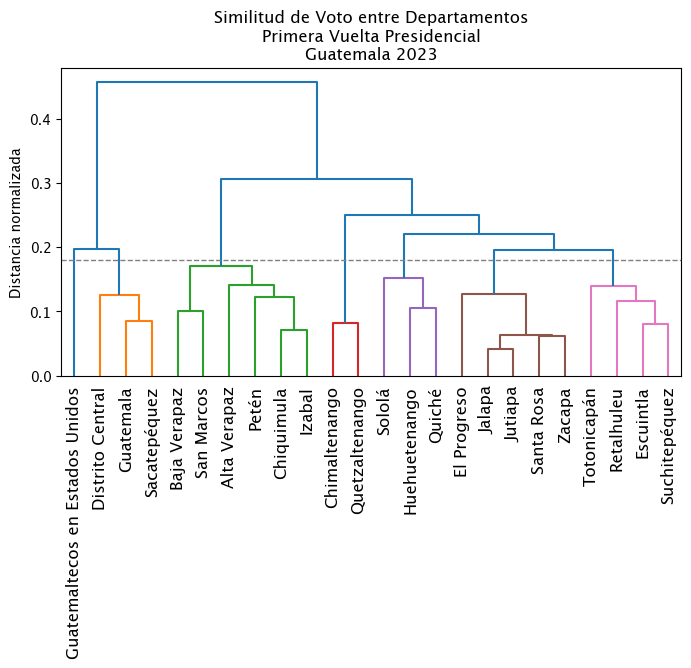

In [178]:
#cluster-geografico
df_sca=df_pre[partidos_pre+['DEPARTAMENTO']].groupby(df_pre['DEPARTAMENTO']).sum().copy()
df_nor=df_sca[partidos_pre].div(df_sca[partidos_pre].sum(axis=1), axis=0).copy()

complete_clustering = linkage(df_nor, method="complete", metric="euclidean")
average_clustering = linkage(df_nor, method="average", metric="euclidean")
single_clustering = linkage(df_nor, method="single", metric="euclidean")

max_d = 0.18

dendrogram(complete_clustering, leaf_rotation=90,leaf_font_size=12, labels=df_nor.index, color_threshold=max_d)

plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud de Voto entre Departamentos\nPrimera Vuelta Presidencial\nGuatemala 2023')
plt.ylabel("Distancia normalizada")


plt.savefig('img_dendo_cluster.png', bbox_inches='tight', dpi=300)
Image.open('img_dendo_cluster.png').save('img_dendo_cluster.jpf')


plt.show()

In [173]:
series_plot=pd.Series(list(fcluster(complete_clustering, max_d, criterion='distance')), index=df_nor.index)

try:
    del dfg
except:
    pass
dfg=plot_depts(series_plot)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2590373174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2590373174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2590373174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

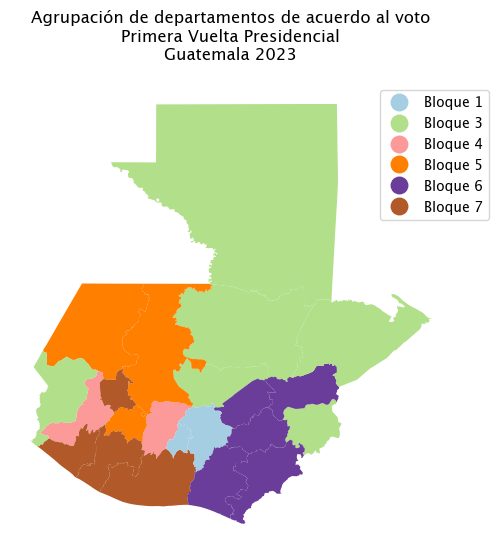

In [176]:
fig, ax = plt.subplots(figsize=(8,6))


# # create the colorbar
#norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
#cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

dfg.plot(ax=ax,column='graph', legend=True, cmap='Paired',  categorical=True,
         legend_kwds={'loc':'upper right', 
                        'bbox_to_anchor':(1.1, 1), 
                        'markerscale':1.29, 
                        'title_fontsize':'medium', 
                        'fontsize':'medium'}, )

#ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Agrupación de departamentos de acuerdo al voto\nPrimera Vuelta Presidencial\nGuatemala 2023')

leg1 = ax.get_legend()

#new_legtxt = ["UNE y SEMILLA similar","UNE primero VAMOS segundo"]
new_legtxt = ["Bloque 1","Bloque 3","Bloque 4","Bloque 5","Bloque 6","Bloque 7"]
for ix,eb in enumerate(leg1.get_texts()):
    #print(eb.get_text(), "-->", new_legtxt[ix])
    eb.set_text(new_legtxt[ix])

plt.savefig('img_dept_cluster.png', bbox_inches='tight', dpi=300)
Image.open('img_dept_cluster.png').save('img_dept_cluster.jpf')


plt.show()

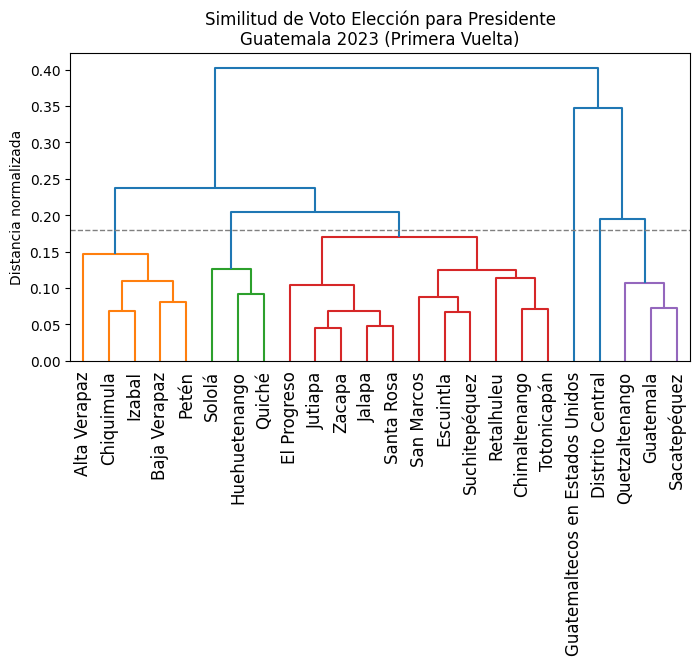

In [75]:
#cluster geografico+nulos
try:
    del df_sca
    del df_nor
except:
    pass

df_sca=df_pre[partidos_pre+['NULOS','DEPARTAMENTO']].groupby(df_pre['DEPARTAMENTO']).sum().copy()
df_nor=df_sca[partidos_pre+['NULOS']].div(df_sca[partidos_pre+["NULOS"]].sum(axis=1), axis=0).copy()

complete_clustering = linkage(df_nor, method="complete", metric="euclidean")
average_clustering = linkage(df_nor, method="average", metric="euclidean")
single_clustering = linkage(df_nor, method="single", metric="euclidean")

max_d = 0.18

dendrogram(complete_clustering, leaf_rotation=90,leaf_font_size=12, labels=df_nor.index, color_threshold=max_d)

plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud de Voto Elección para Presidente\nGuatemala 2023 (Primera Vuelta)')
plt.ylabel("Distancia normalizada")
plt.show()

In [77]:
series_plot=pd.Series(list(fcluster(complete_clustering, max_d, criterion='distance')), index=df_nor.index)

try:
    del dfg
except:
    pass
dfg=plot_depts(series_plot)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2590373174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2590373174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2590373174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

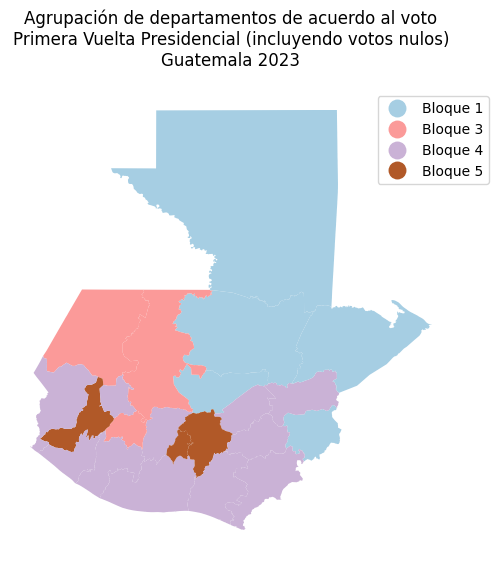

In [113]:
fig, ax = plt.subplots(figsize=(8,6))

# # create the colorbar
#norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
#cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

dfg.plot(ax=ax,column='graph', legend=True, cmap='Paired',  categorical=True,
         legend_kwds={'loc':'upper right', 
                        'bbox_to_anchor':(1.1, 1), 
                        'markerscale':1.29, 
                        'title_fontsize':'medium', 
                        'fontsize':'medium'}, )

#ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Agrupación de departamentos de acuerdo al voto\nPrimera Vuelta Presidencial (incluyendo votos nulos)\nGuatemala 2023')

leg1 = ax.get_legend()

#new_legtxt = ["UNE y SEMILLA similar","UNE primero VAMOS segundo"]
new_legtxt = ["Bloque 1","Bloque 3","Bloque 4","Bloque 5","Bloque 6","Bloque 7"]
for ix,eb in enumerate(leg1.get_texts()):
    #print(eb.get_text(), "-->", new_legtxt[ix])
    eb.set_text(new_legtxt[ix])

#plt.savefig('img_temp.png', bbox_inches='tight', dpi=300)
#Image.open('img_temp.png').save('img_temp.jpf')

plt.show()

In [20]:
#performance por grupo
clusters = fcluster(complete_clustering, max_d, criterion='distance')
depts=list(df_nor.index)
group={}
for i in range(max(clusters)):
    group[i+1]=[]

for k in range(len(clusters)):
    group[clusters[k]].append(depts[k])
order=list(df_nor.mean(axis=0).sort_values(ascending=False).index)
for k in range(max(clusters)):
    #df_nor[order].loc[group[k+1]].boxplot(rot=90)
    ax=sns.boxplot(data=df_nor[order].loc[group[k+1]])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
    plt.title("Distribución de Voto para Presidente\nBloque "+str(k+1)+": "+", ".join(group[k+1])+"\nPrimera Vuelta Presidencial\nGuatemala 2023")
    
    plt.savefig('img_dist_bloq_'+str(k+1)+'.png', bbox_inches='tight', dpi=300)
    Image.open('img_dist_bloq_'+str(k+1)+'.png').save('img_dist_bloq_'+str(k+1)+'.jpf')
    
    plt.show()

NameError: name 'complete_clustering' is not defined

In [9]:
total_votos=df_pre['TOTAL'].sum()
for k in range(max(clusters)):
    print("Bloque {:,}".format(k+1)+": {:.0f}%".format(100*df_pre.groupby(df_pre['DEPARTAMENTO'])['TOTAL'].sum().loc[group[k+1]].sum()/total_votos))

Bloque 1: 25%
Bloque 2: 0%
Bloque 3: 24%
Bloque 4: 9%
Bloque 5: 16%
Bloque 6: 12%
Bloque 7: 13%


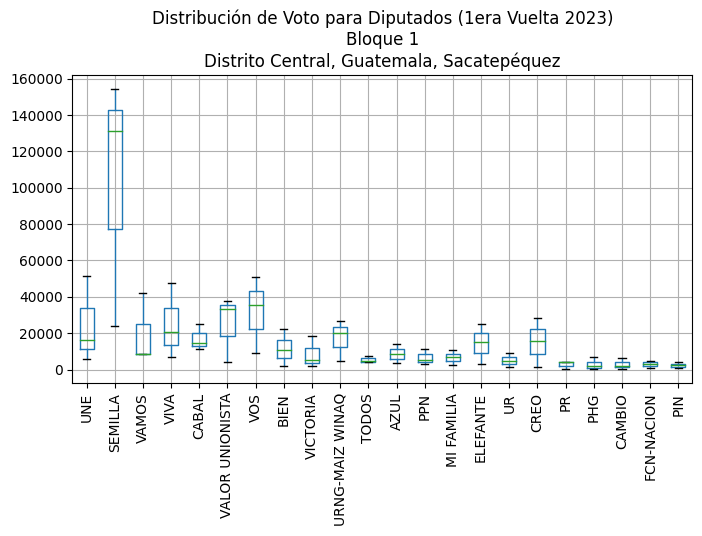

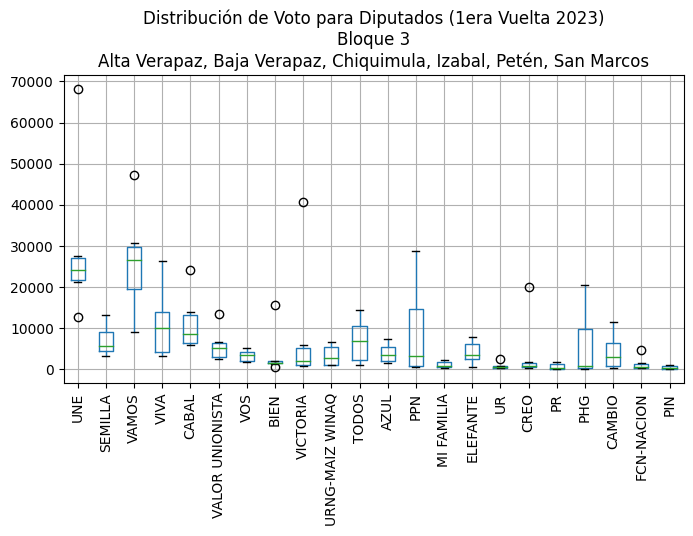

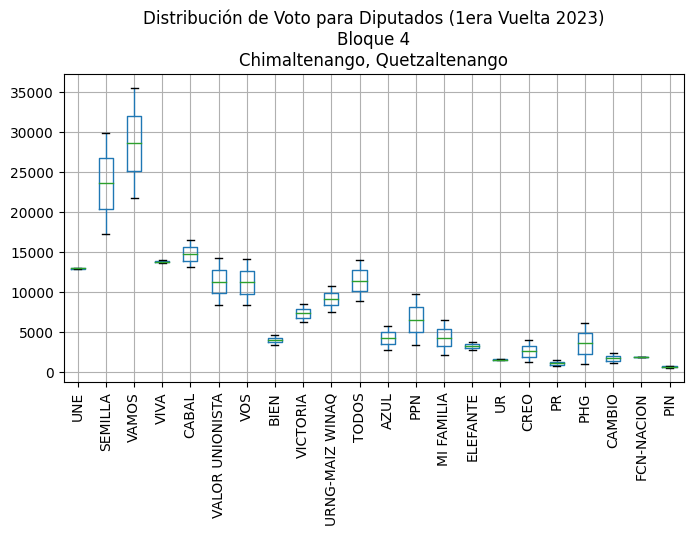

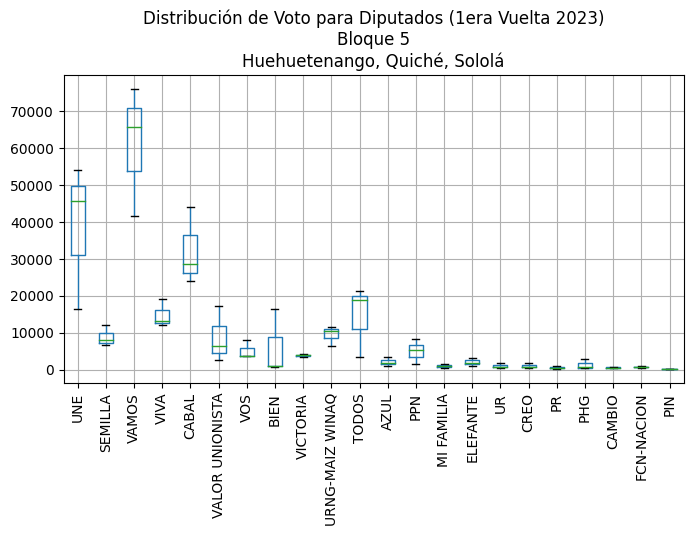

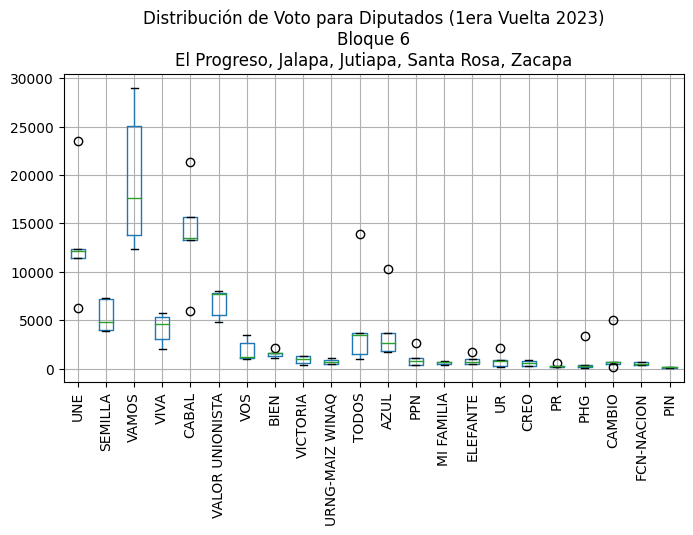

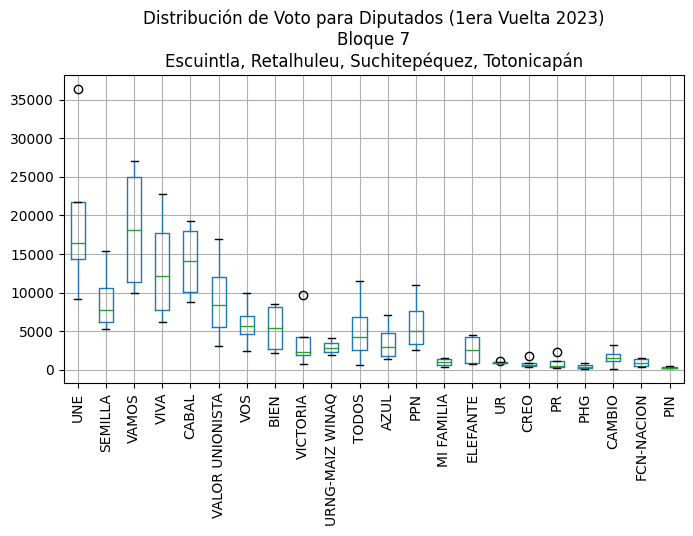

In [24]:
#Diputados por bloque
for k in range(max(clusters)):
    try:
        df_dnc[order].groupby(df_dnc['DEPARTAMENTO']).sum().loc[group[k+1]].boxplot(rot=90)
        #plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
        plt.title("Distribución de Voto para Diputados (1era Vuelta 2023)\nBloque "+str(k+1)+"\n"+", ".join(group[k+1]))
        plt.show()
    except:
        pass

In [94]:
#condicional
partido_cond='UNE'

In [95]:
#cond presidente
try:
    del df_mesa
except:
    pass
df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])
for index, row in df_pre.iterrows():
    if df_pre[partidos_pre+['NULOS']].iloc[index].idxmax()==partido_cond:
        new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
        df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)


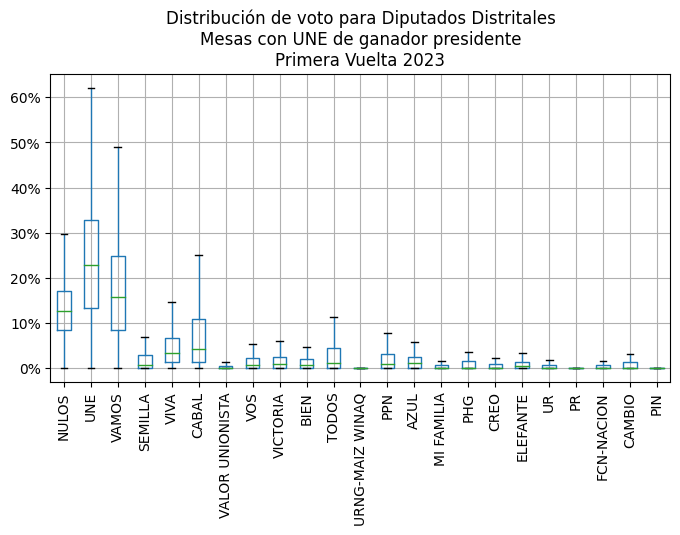

In [98]:
try:
    del df_temp
except:
    pass
df_temp=df_ddt[df_ddt['MESA'].isin(df_mesa['MESA'])][['NULOS']+order].replace(np.nan, 0).copy()
try:
    del df_norm
except:
    pass
df_norm=df_temp.div(df_temp.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
df_norm.boxplot(rot=90, showfliers=False)
plt.title('Distribución de voto para Diputados Distritales\nMesas con '+partido_cond+' de ganador presidente\nPrimera Vuelta 2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()

In [18]:
#condicional nulo diputaciones
partido_cond='NULOS'
try:
    del df_mesa
except:
    pass
df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])
for index, row in df_pre.iterrows():
    if df_pre[partidos_pre+['NULOS']].iloc[index].idxmax()==partido_cond:
        new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
        df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)


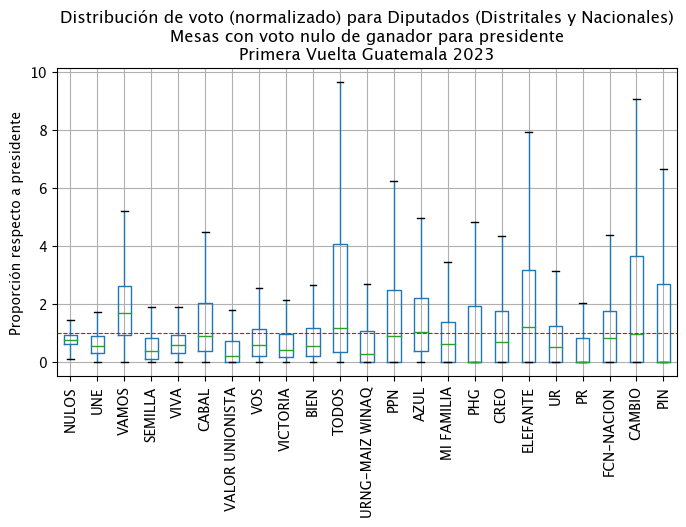

In [75]:
try:
    del df_temp
except:
    pass
df_temp1=df_ddt[df_ddt['MESA'].isin(df_mesa['MESA'])][['NULOS']+order].replace(np.nan, 0).copy()
df_temp2=df_dnc[df_dnc['MESA'].isin(df_mesa['MESA'])][['NULOS']+order].replace(np.nan, 0).copy()
df_temp=pd.concat([df_temp1, df_temp2],ignore_index=True)
#df_temp=df_temp2.copy()
try:
    del df_norm
except:
    pass
df_norm=df_temp.div(df_temp.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()

series_prom=df_pre[df_pre['MESA'].isin(df_mesa['MESA'])][partidos_pre+['NULOS']].sum().divide(df_pre[df_pre['MESA'].isin(df_mesa['MESA'])][partidos_pre+['NULOS']].sum().sum())

df_norm_rat=df_norm.div(series_prom).copy()

#df_norm.boxplot(rot=90, showfliers=False)
df_norm_rat[['NULOS']+order].boxplot(rot=90, showfliers=False)

plt.title('Distribución de voto (normalizado) para Diputados (Distritales y Nacionales)\nMesas con voto nulo de ganador para presidente\nPrimera Vuelta Guatemala 2023')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylabel('Proporción respecto a presidente')

plt.axhline(y = 1, color = 'r', linestyle = '--',linewidth=0.8)


plt.show()

In [99]:
#cond presidente margen
margin=0.5

try:
    del df_mesa
except:
    pass
df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])

for index, row in df_pre.iterrows():
    if df_pre[partidos_pre+['NULOS']].iloc[index].idxmax()==partido_cond:
        top=df_pre[partidos_pre+['NULOS']].iloc[index].nlargest(2)
        if (top[0]-top[1])/top[0]>margin:
            new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
            df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)


/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/2072387059.py:13: RuntimeWarning: invalid val

In [69]:
len(df_mesa)

1286

In [75]:
len(df_mesa['DEPARTAMENTO'].unique())

24

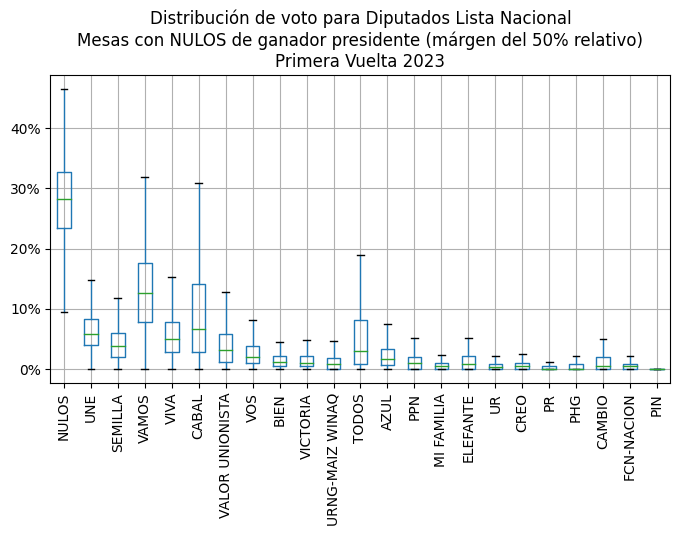

In [96]:
try:
    del df_temp
except:
    pass
df_temp=df_dnc[df_dnc['MESA'].isin(df_mesa['MESA'])][['NULOS']+order].replace(np.nan, 0).copy()
try:
    del df_norm
except:
    pass
df_norm=df_temp.div(df_temp.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
df_norm.boxplot(rot=90, showfliers=False)
plt.title('Distribución de voto para Diputados Lista Nacional\nMesas con '+partido_cond+' de ganador presidente (márgen del '+"{:.0f}".format(margin*100)+'% relativo)\nPrimera Vuelta 2023' )
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()

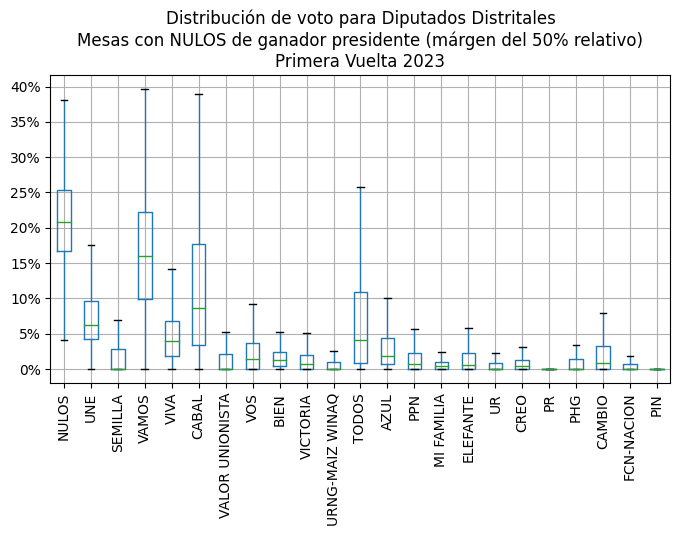

In [97]:
try:
    del df_temp
except:
    pass
df_temp=df_ddt[df_ddt['MESA'].isin(df_mesa['MESA'])][['NULOS']+order].replace(np.nan, 0).copy()
try:
    del df_norm
except:
    pass
df_norm=df_temp.div(df_temp.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
df_norm.boxplot(rot=90, showfliers=False)
plt.title('Distribución de voto para Diputados Distritales\nMesas con '+partido_cond+' de ganador presidente (márgen del '+"{:.0f}".format(margin*100)+'% relativo)\nPrimera Vuelta 2023' )
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()

In [31]:
#cond diputados-nacionales
try:
    del df_mesa
except:
    pass
df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])

margin=0.1
for index, row in df_dnc.iterrows():
    if df_dnc[partidos_pre].iloc[index].idxmax()==partido_cond:
        top=df_dnc[partidos_pre].iloc[index].nlargest(2)
        if (top[0]-top[1])/top[0]>margin:
            new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
            df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)



/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1537048912.py:12: RuntimeWarning: invalid val

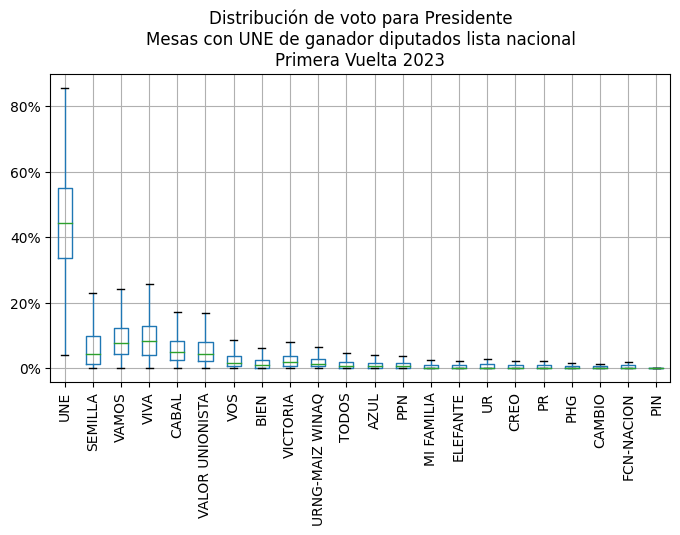

In [32]:
try:
    del df_temp
except:
    pass
df_temp=df_pre[df_pre['MESA'].isin(df_mesa['MESA'])][order].replace(np.nan, 0).copy()
try:
    del df_norm
except:
    pass
df_norm=df_temp.div(df_temp.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
df_norm.boxplot(rot=90, showfliers=False)
plt.title('Distribución de voto para Presidente\nMesas con '+partido_cond+' de ganador diputados lista nacional\nPrimera Vuelta 2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()

In [33]:
#cond diputados-distritales
try:
    del df_mesa
except:
    pass
df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])

margin=0.1
for index, row in df_ddt.iterrows():
    if df_ddt[partidos_pre].iloc[index].idxmax()==partido_cond:
        top=df_ddt[partidos_pre].iloc[index].nlargest(2)
        if (top[0]-top[1])/top[0]>margin:
            new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
            df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)



/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if (top[0]-top[1])/top[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1479310467.py:12: RuntimeWarning: invalid val

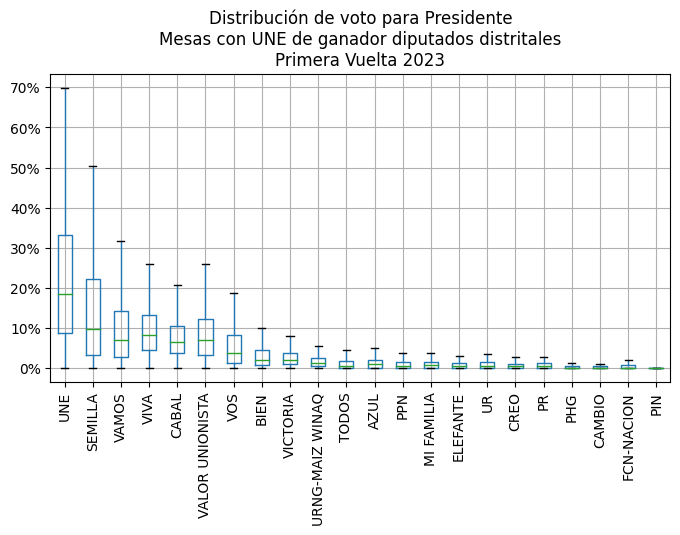

In [34]:
try:
    del df_temp
except:
    pass
df_temp=df_pre[df_pre['MESA'].isin(df_mesa['MESA'])][order].replace(np.nan, 0).copy()
try:
    del df_norm
except:
    pass
df_norm=df_temp.div(df_temp.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
df_norm.boxplot(rot=90, showfliers=False)
plt.title('Distribución de voto para Presidente\nMesas con '+partido_cond+' de ganador diputados distritales\nPrimera Vuelta 2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()

In [35]:
#cluster partidos
def cond_partido(partido):
    df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])
    for index, row in df_pre.iterrows():
        try:
            if ((df_pre[df_pre['MESA']==row['MESA']][partidos_pre].iloc[0].idxmax()==partido) or (df_dnc[df_dnc['MESA']==row['MESA']][partidos_pre].iloc[0].idxmax()==partido) or (df_ddt[df_ddt['MESA']==row['MESA']][partidos_pre].iloc[0].idxmax()==partido)):
                new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
                df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)
        except:
            pass
    df1=df_pre.loc[df_pre['MESA'].isin( list(df_mesa['MESA']))][partidos_pre].copy()
    df2=df_dnc.loc[df_dnc['MESA'].isin( list(df_mesa['MESA']))][partidos_pre].copy()
    df3=df_ddt.loc[df_ddt['MESA'].isin( list(df_mesa['MESA']))][partidos_pre].copy()
    df1_norm=df1.div(df1.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    df2_norm=df2.div(df2.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    df3_norm=df3.div(df3.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    return (df1_norm.mean()+df2_norm.mean()+df3_norm.mean())/3

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


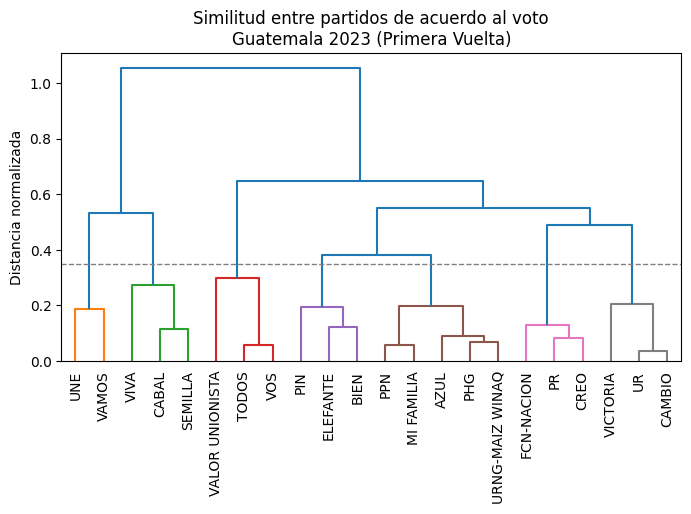

In [36]:
try:
    del df_correl
except:
    pass
df_correl=pd.DataFrame(columns=partidos_pre)
for partido in partidos_pre:
    partido_series=cond_partido(partido)
    df_correl = pd.concat([df_correl, pd.DataFrame([partido_series])], ignore_index=True)
df_correl['PARTIDO']=partidos_pre
df_correl=df_correl.set_index('PARTIDO').copy()
df_dist=pd.DataFrame(columns=partidos_pre, index=partidos_pre)
for partido1 in partidos_pre:
    for partido2 in partidos_pre:
        #df_dist2[partido1].loc[partido2]=(abs(df_correl.loc[partido1][partido2]-df_correl.loc[partido2][partido1]))*(1-(df_correl.loc[partido1][partido2]+df_correl.loc[partido2][partido1])/2)
        #df_dist2[partido1].loc[partido2]=math.log(1+(abs(df_correl.loc[partido1][partido2]-df_correl.loc[partido2][partido1]))*(1-(df_correl.loc[partido1][partido2]+df_correl.loc[partido2][partido1])/2))
        df_dist[partido1].loc[partido2]=math.sqrt(((abs(df_correl.loc[partido1][partido2]-df_correl.loc[partido2][partido1]))*(1-(df_correl.loc[partido1][partido2]+df_correl.loc[partido2][partido1])/2))/0.17)

d_max=0.35
clustering = AgglomerativeClustering(affinity="precomputed", linkage='complete',distance_threshold=0.25, n_clusters=None).fit(df_dist)
plot_dendrogram(clustering, truncate_mode="level", labels=partidos_pre, leaf_rotation=90,color_threshold=d_max)
plt.axhline(y=d_max, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud entre partidos de acuerdo al voto\nGuatemala 2023 (Primera Vuelta)')
plt.ylabel("Distancia normalizada")
#plt.gca().set_yscale('logit')
plt.show()

In [ ]:
#condicional+nulos
def cond_partido_nulos(partido):
    df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])
    for index, row in df_pre.iterrows():
        try:
            if ((df_pre[df_pre['MESA']==row['MESA']][partidos_pre+['NULOS']].iloc[0].idxmax()==partido) or (df_dnc[df_dnc['MESA']==row['MESA']][partidos_pre+['NULOS']].iloc[0].idxmax()==partido) or (df_ddt[df_ddt['MESA']==row['MESA']][partidos_pre+['NULOS']].iloc[0].idxmax()==partido)):
                new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
                df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)
        except:
            pass
    df1=df_pre.loc[df_pre['MESA'].isin( list(df_mesa['MESA']))][partidos_pre+['NULOS']].copy()
    df2=df_dnc.loc[df_dnc['MESA'].isin( list(df_mesa['MESA']))][partidos_pre+['NULOS']].copy()
    df3=df_ddt.loc[df_ddt['MESA'].isin( list(df_mesa['MESA']))][partidos_pre+['NULOS']].copy()
    df1_norm=df1.div(df1.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    df2_norm=df2.div(df2.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    df3_norm=df3.div(df3.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    return (df1_norm.mean()+df2_norm.mean()+df3_norm.mean())/3
        


In [ ]:
try:
    del df_correl
except:
    pass
df_correl=pd.DataFrame(columns=partidos_pre+['NULOS'])
for partido in partidos_pre+['NULOS']:
    partido_series=cond_partido_nulos(partido)
    df_correl = pd.concat([df_correl, pd.DataFrame([partido_series])], ignore_index=True)
df_correl['PARTIDO']=partidos_pre+['NULOS']
df_correl=df_correl.set_index('PARTIDO').copy()
df_dist2=pd.DataFrame(columns=partidos_pre+['NULOS'], index=partidos_pre+['NULOS'])
for partido1 in partidos_pre+['NULOS']:
    for partido2 in partidos_pre+['NULOS']:
        #df_dist[partido1].loc[partido2]=abs(df_correl.loc[partido1][[partido2]]-df_correl.loc[partido2][partido1])
        df_dist2[partido1].loc[partido2]=math.sqrt(((abs(df_correl.loc[partido1][partido2]-df_correl.loc[partido2][partido1]))*(1-(df_correl.loc[partido1][partido2]+df_correl.loc[partido2][partido1])/2))/1)
d_max=0.35
clustering2 = AgglomerativeClustering(affinity="precomputed", linkage='complete',distance_threshold=0.05, n_clusters=None).fit(df_dist2)
plot_dendrogram(clustering2, truncate_mode="level", labels=partidos_pre+['NULOS'], leaf_rotation=90,color_threshold=d_max)
plt.axhline(y=d_max, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud entre partidos de acuerdo al voto\nGuatemala 2023 (Primera Vuelta)')
plt.ylabel("Distancia normalizada")
#plt.gca().set_yscale('logit')
plt.show()


In [86]:
#cluster con margen
def cond_partido_margen(partido, margin):
    df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])
    for index, row in df_pre.iterrows():
        flag1=False
        flag2=False
        flag3=False
        try:
            if df_pre[df_pre['MESA']==row['MESA']][partidos_pre].iloc[0].idxmax()==partido:
                top1=df_pre[partidos_pre].iloc[index].nlargest(2)
                if (top1[0]-top1[1])/top1[0]>margin:
                    flag1=True
        except:
            pass
        try:
            if df_dnc[df_dnc['MESA']==row['MESA']][partidos_pre].iloc[0].idxmax()==partido:
                top2=df_dnc[partidos_pre].iloc[index].nlargest(2)
                if (top2[0]-top2[1])/top2[0]>margin:
                    flag1=True
        except:
            pass
        try:
            if df_ddt[df_ddt['MESA']==row['MESA']][partidos_pre].iloc[0].idxmax()==partido:
                top3=df_ddt[partidos_pre].iloc[index].nlargest(2)
                if (top3[0]-top3[1])/top3[0]>margin:
                    flag3=True
        except:
            pass
        if (flag1 or flag2 or flag3):
            new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
            df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)
    df1=df_pre.loc[df_pre['MESA'].isin( list(df_mesa['MESA']))][partidos_pre+['NULOS']].copy()
    df2=df_dnc.loc[df_dnc['MESA'].isin( list(df_mesa['MESA']))][partidos_pre+['NULOS']].copy()
    df3=df_ddt.loc[df_ddt['MESA'].isin( list(df_mesa['MESA']))][partidos_pre+['NULOS']].copy()
    df1_norm=df1.div(df1.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    df2_norm=df2.div(df2.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    df3_norm=df3.div(df3.sum(axis=1), axis=0).replace(np.inf, 0).replace(np.nan, 0).copy()
    return (df1_norm.mean()+df2_norm.mean()+df3_norm.mean())/3

In [87]:
margin=0.5
try:
    del df_correl
except:
    pass
df_correl=pd.DataFrame(columns=partidos_pre)
for partido in partidos_pre:
    partido_series=cond_partido_margen(partido, margin)
    df_correl = pd.concat([df_correl, pd.DataFrame([partido_series])], ignore_index=True)
df_correl['PARTIDO']=partidos_pre
df_correl=df_correl.set_index('PARTIDO').copy()
df_dist3=pd.DataFrame(columns=partidos_pre, index=partidos_pre)
for partido1 in partidos_pre:
    for partido2 in partidos_pre:
        #df_dist[partido1].loc[partido2]=abs(df_correl.loc[partido1][[partido2]]-df_correl.loc[partido2][partido1])
        df_dist3[partido1].loc[partido2]=math.sqrt(((abs(df_correl.loc[partido1][partido2]-df_correl.loc[partido2][partido1]))*(1-(df_correl.loc[partido1][partido2]+df_correl.loc[partido2][partido1])/2))/1)


/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if (top2[0]-top2[1])/top2[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if (top1[0]-top1[1])/top1[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:11: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarni

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarning: invalid value encountered in scalar divide
  if (top3[0]-top3[1])/top3[0]>margin:
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/1926811093.py:25: RuntimeWarni

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


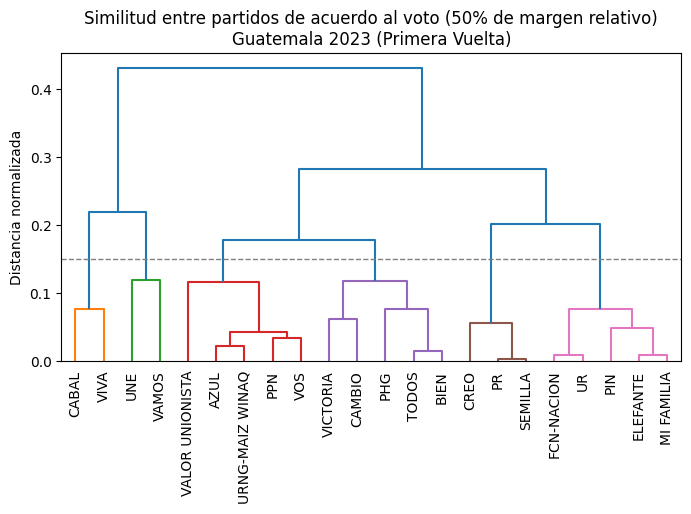

In [95]:
d_max=0.15
clustering3 = AgglomerativeClustering(affinity="precomputed", linkage='complete',distance_threshold=0.05, n_clusters=None).fit(df_dist3)
plot_dendrogram(clustering3, truncate_mode="level", labels=partidos_pre, leaf_rotation=90,color_threshold=d_max)
plt.axhline(y=d_max, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud entre partidos de acuerdo al voto ('+"{:.0f}".format(100*margin)+'% de margen relativo)\nGuatemala 2023 (Primera Vuelta)')
plt.ylabel("Distancia normalizada")
#plt.gca().set_yscale('logit')
plt.show()


In [161]:
#Mesas por depto

In [300]:
df_pre.groupby(df_pre['DEPARTAMENTO']).count()['MESA']

DEPARTAMENTO
Alta Verapaz                       1726
Baja Verapaz                        479
Chimaltenango                       922
Chiquimula                          702
Distrito Central                   2023
El Progreso                         346
Escuintla                          1178
Guatemala                          3313
Guatemaltecos en Estados Unidos     158
Huehuetenango                      1893
Izabal                              674
Jalapa                              509
Jutiapa                             863
Petén                               877
Quetzaltenango                     1320
Quiché                             1444
Retalhuleu                          538
Sacatepéquez                        551
San Marcos                         1666
Santa Rosa                          709
Sololá                              706
Suchitepéquez                       866
Totonicapán                         658
Zacapa                              464
Name: MESA, dtype: int64

In [325]:
dfg_mesas=plot_depts_sum(df_pre.groupby(df_pre['DEPARTAMENTO']).count()['MESA'])

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/41419423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/41419423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/41419423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

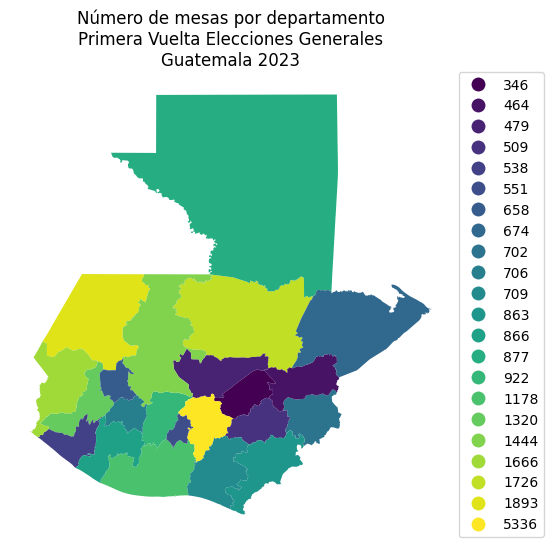

In [327]:
fig, ax = plt.subplots(figsize=(8,6))
dfg_mesas.plot(ax=ax,column='graph', legend=True, cmap='viridis', legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})
plt.axis('off')
plt.title('Número de mesas por departamento\nPrimera Vuelta Elecciones Generales\nGuatemala 2023')
plt.show()

In [91]:
df_pre.groupby(df_pre['DEPARTAMENTO'])['NULOS'].sum().divide(df_pre.groupby(df_pre['DEPARTAMENTO'])['EMITIDOS'].sum())

DEPARTAMENTO
Alta Verapaz                       0.181985
Baja Verapaz                       0.244737
Chimaltenango                      0.168848
Chiquimula                         0.215303
Distrito Central                   0.098722
El Progreso                        0.242812
Escuintla                          0.208819
Guatemala                          0.139779
Guatemaltecos en Estados Unidos    0.405147
Huehuetenango                      0.167958
Izabal                             0.263449
Jalapa                             0.202320
Jutiapa                            0.235429
Petén                              0.272794
Quetzaltenango                     0.143393
Quiché                             0.147086
Retalhuleu                         0.186875
Sacatepéquez                       0.138954
San Marcos                         0.180057
Santa Rosa                         0.231442
Sololá                             0.152879
Suchitepéquez                      0.177374
Totonicapán        

In [76]:
#nulos por depto
dfg_nulos=plot_depts_rat(df_pre.groupby(df_pre['DEPARTAMENTO'])['NULOS'].sum().divide(df_pre.groupby(df_pre['DEPARTAMENTO'])['EMITIDOS'].sum()))

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_44953/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_44953/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_44953/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [85]:
for index, value in df_pre.groupby(df_pre['DEPARTAMENTO'])['NULOS'].sum().divide(df_pre.groupby(df_pre['DEPARTAMENTO'])['EMITIDOS'].sum()).items():
    print(index, "{:.0f}%".format(value*100))

Alta Verapaz 18%
Baja Verapaz 24%
Chimaltenango 17%
Chiquimula 22%
Distrito Central 10%
El Progreso 24%
Escuintla 21%
Guatemala 14%
Guatemaltecos en Estados Unidos 41%
Huehuetenango 17%
Izabal 26%
Jalapa 20%
Jutiapa 24%
Petén 27%
Quetzaltenango 14%
Quiché 15%
Retalhuleu 19%
Sacatepéquez 14%
San Marcos 18%
Santa Rosa 23%
Sololá 15%
Suchitepéquez 18%
Totonicapán 16%
Zacapa 26%


In [79]:
dfg_nulos['graph']

0     0.181985
1     0.244737
2     0.168848
3     0.215303
4     0.242812
5     0.208819
6     0.119251
7     0.167958
8      0.20232
9     0.235429
10    0.143393
11    0.147086
12    0.186875
13    0.138954
14    0.180057
15    0.231442
16    0.152879
17    0.177374
18    0.161083
19    0.259208
20    0.272794
21    0.263449
Name: graph, dtype: object

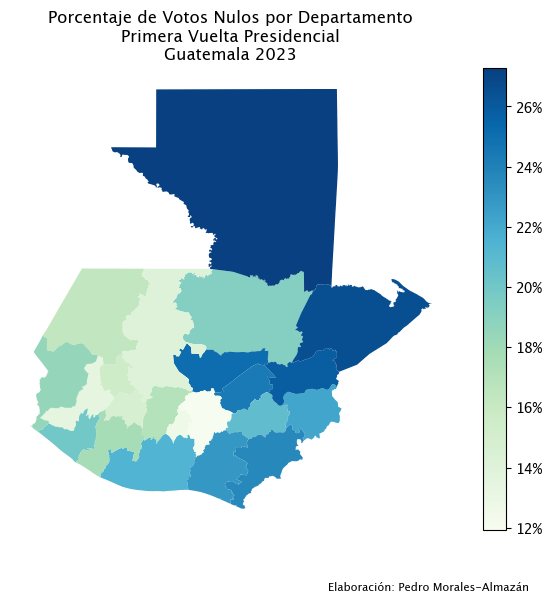

In [108]:
fig, ax = plt.subplots(figsize=(8,6))

# getting the original colormap using cm.get_cmap() function
#orig_map=plt.cm.get_cmap('hot')
  
# reversing the original colormap using reversed() function
#c_map = orig_map.reversed()
c_map='GnBu'

# # create the colorbar
norm = colors.Normalize(vmin=dfg_nulos['graph'].min(), vmax=dfg_nulos['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)

dfg_nulos.plot(ax=ax,column='graph', legend=False, cmap=c_map,  
               legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), 'fmt':"{:.2f}","reverse":True})

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Porcentaje de Votos Nulos por Departamento\nPrimera Vuelta Presidencial\nGuatemala 2023')


txt="Elaboración: Pedro Morales-Almazán"
plt.figtext(0.59, 0.01, txt, wrap=True, horizontalalignment='left', fontsize=8)


plt.savefig('img_nulo_depts.png', bbox_inches='tight', dpi=300)

plt.show()

In [332]:
#heatmap por partido
partido_base='UNE'

In [333]:
dfg_partido=plot_depts_rat(df_pre.groupby(df_pre['DEPARTAMENTO'])[partido_base].sum().divide(df_pre.groupby(df_pre['DEPARTAMENTO'])[partidos_pre].sum().sum(axis=1)))

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

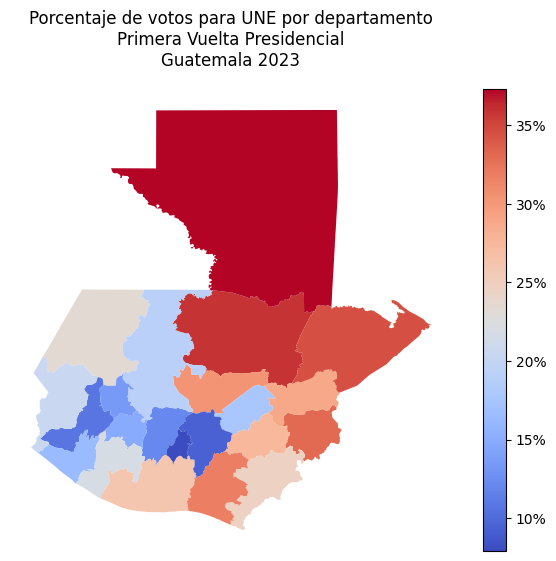

In [334]:
fig, ax = plt.subplots(figsize=(8,6))

# # create the colorbar
norm = colors.Normalize(vmin=dfg_partido['graph'].min(), vmax=dfg_partido['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

dfg_partido.plot(ax=ax,column='graph', legend=False, cmap='coolwarm',  
               legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), 'fmt':"{:.2f}","reverse":True})

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Porcentaje de votos para '+partido_base+' por departamento\nPrimera Vuelta Presidencial\nGuatemala 2023')


plt.show()

In [335]:
partido_cond='SEMILLA'
margin=0.5

try:
    del df_mesa
except:
    pass
df_mesa=pd.DataFrame(columns=['MESA','DEPARTAMENTO','MUNICIPIO'])

for index, row in df_pre.iterrows():
    if df_pre[partidos_pre].iloc[index].idxmax()==partido_cond:
        top=df_pre[partidos_pre].iloc[index].nlargest(2)
        if (top[0]-top[1])/top[0]>margin:
            new_row = pd.DataFrame({'MESA':row['MESA'], 'DEPARTAMENTO':row['DEPARTAMENTO'], 'MUNICIPIO':row['MUNICIPIO']}, index=[0])
            df_mesa = pd.concat([new_row,df_mesa.loc[:]]).reset_index(drop=True)

In [336]:
series_plot=df_mesa.groupby(df_mesa['DEPARTAMENTO']).count()['MESA'].divide(df_pre.groupby(df_pre['DEPARTAMENTO']).count()['MESA'], fill_value=0)

try:
    del dfg
except:
    pass
dfg=plot_depts_rat(series_plot)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

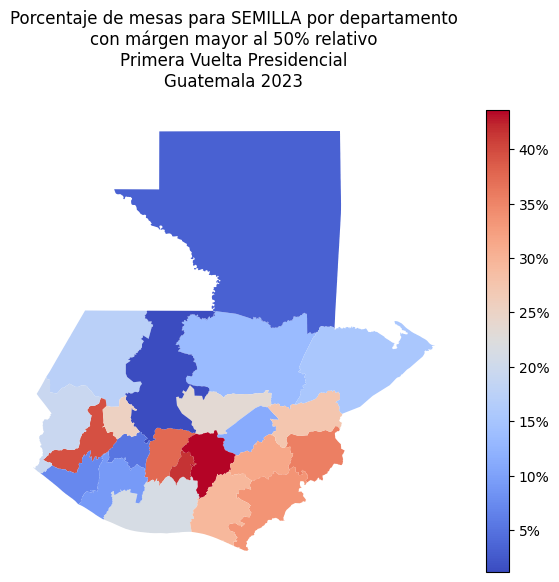

In [337]:
fig, ax = plt.subplots(figsize=(8,6))

# # create the colorbar
norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

dfg.plot(ax=ax,column='graph', legend=False, cmap='coolwarm')

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Porcentaje de mesas para '+partido_cond+' por departamento\ncon márgen mayor al '+"{:.0f}%".format(100*margin)+' relativo\nPrimera Vuelta Presidencial\nGuatemala 2023')


plt.show()

In [367]:
#Diferencia porcentual
series_plot=(df_pre.groupby(df_pre['DEPARTAMENTO'])[partidos_pre].sum()['UNE']-df_pre.groupby(df_pre['DEPARTAMENTO'])[partidos_pre].sum()['SEMILLA']).divide(df_pre.groupby(df_pre['DEPARTAMENTO'])['EMITIDOS'].sum())

try:
    del dfg
except:
    pass
dfg=plot_depts_rat(series_plot)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [373]:
series_plot

DEPARTAMENTO
Alta Verapaz                       0.235394
Baja Verapaz                       0.142077
Chimaltenango                     -0.016727
Chiquimula                         0.168326
Distrito Central                  -0.245318
El Progreso                        0.065488
Escuintla                          0.119146
Guatemala                         -0.137495
Guatemaltecos en Estados Unidos   -0.078676
Huehuetenango                      0.133922
Izabal                             0.184147
Jalapa                             0.122011
Jutiapa                            0.094467
Petén                              0.180125
Quetzaltenango                    -0.060234
Quiché                             0.153120
Retalhuleu                         0.079843
Sacatepéquez                      -0.163246
San Marcos                         0.112312
Santa Rosa                         0.125983
Sololá                             0.058494
Suchitepéquez                      0.107357
Totonicapán        

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_10756/3329254614.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('summer')


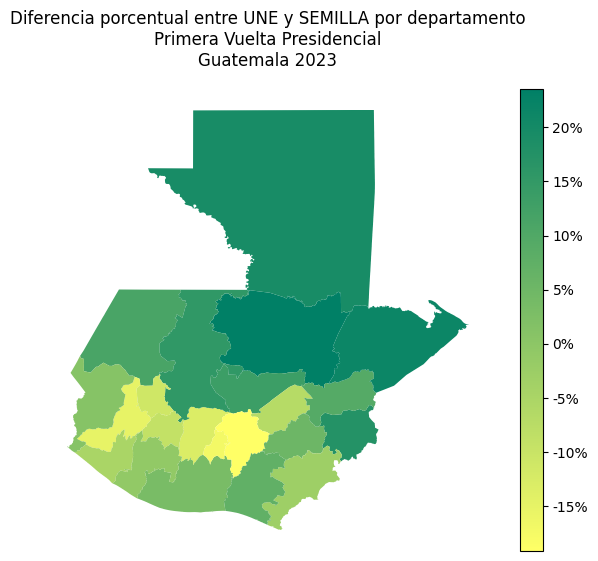

In [369]:
fig, ax = plt.subplots(figsize=(8,6))

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('summer')
  
# reversing the original colormap using reversed() function
c_map = orig_map.reversed()


# # create the colorbar
norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)




dfg.plot(ax=ax,column='graph', legend=False, cmap=c_map)

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Diferencia porcentual entre UNE y SEMILLA por departamento\nPrimera Vuelta Presidencial\nGuatemala 2023')


plt.show()

In [26]:
#partido por municipio
def plot_muns_rat(series):
    try:
        del dfg_temp
    except:
        pass
    dfg_temp=dfg_muns.copy()
    dfg_temp['graph']={}
    for index, value in series.items():
        try:
            #idx=dfg_temp[dfg_temp['nombre']==unidecode(index.upper())].index[0]
            idx=dfg_temp[dfg_temp['Codigo']==index].index[0]
            dfg_temp['graph'].iloc[idx]=value
        except:
            pass
    return dfg_temp

In [1]:
dfg_muns

NameError: name 'dfg_muns' is not defined

In [27]:
partido_base='VAMOS'
series_mun=df_pre.groupby(df_pre['CODIGO_MUN'])[partidos_pre+['NULOS']].sum()[partido_base].divide(df_pre.groupby(df_pre['CODIGO_MUN'])['EMITIDOS'].sum())

In [28]:
series_mun

CODIGO_MUN
101     0.015350
102     0.012129
103     0.016600
104          NaN
105     0.087804
          ...   
2311    0.000000
2312    0.015385
2313    0.013986
2314    0.012987
2315    0.125000
Length: 355, dtype: float64

In [29]:
try:
    del dfg
except:
    pass
dfg=plot_muns_rat(series_mun)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

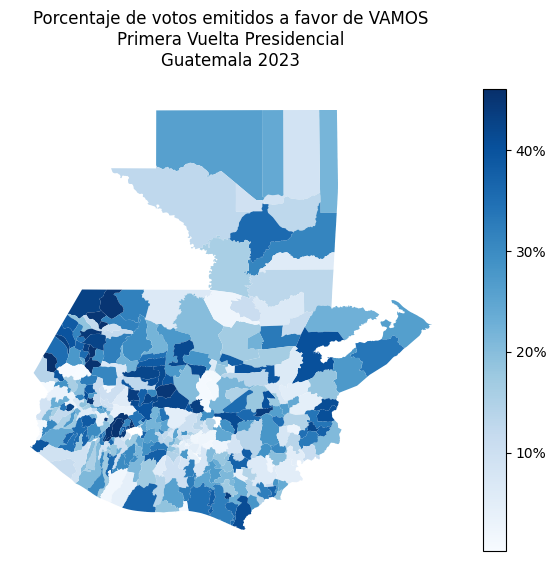

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

c_map='Blues'

#(0.0078125, 0.4375, 0.0507813) #UNE
#(0.429688, 0.4375, 0.0078125) #SEMILLA
#(0.605469, 0.65625, 0.0117188)

#colors_map = [(1, 1, 1), (0.605469, 0.65625, 0.0117188)] 
#c_map = LinearSegmentedColormap.from_list(
#        "Custom", colors_map, N=20)

# # create the colorbar
norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)



dfg.plot(ax=ax,column='graph', legend=False, cmap=c_map)

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Porcentaje de votos emitidos a favor de '+partido_base+'\nPrimera Vuelta Presidencial\nGuatemala 2023')


plt.show()

In [31]:
series_mun=(df_pre.groupby(df_pre['CODIGO_MUN'])[partidos_pre].sum()['UNE']-df_pre.groupby(df_pre['CODIGO_MUN'])[partidos_pre].sum()['SEMILLA']).divide(df_pre.groupby(df_pre['CODIGO_MUN'])['EMITIDOS'].sum())

In [32]:
try:
    del dfg
except:
    pass
dfg=plot_muns_rat(series_mun)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/170896188.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('summer')


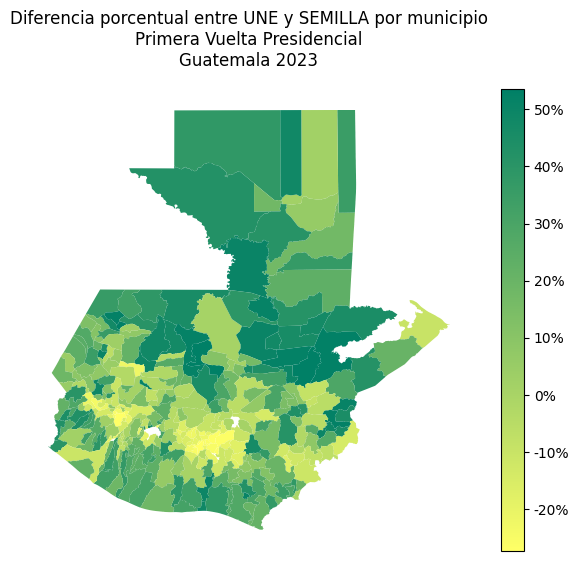

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('summer')
  
# reversing the original colormap using reversed() function
c_map = orig_map.reversed()


# # create the colorbar
norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)



dfg.plot(ax=ax,column='graph', legend=False, cmap=c_map)

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Diferencia porcentual entre UNE y SEMILLA por municipio\nPrimera Vuelta Presidencial\nGuatemala 2023')


plt.show()

In [34]:
#margen 1-2
dict_mun={}
for index, row in df_pre.groupby(df_pre['CODIGO_MUN'])[partidos_pre+['EMITIDOS']].sum().iterrows():
    top=row[partidos_pre].nlargest(2)
    dict_mun[index]=(top[0]-top[1])/row['EMITIDOS']

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2701196768.py:5: RuntimeWarning: invalid value encountered in scalar divide
  dict_mun[index]=(top[0]-top[1])/row['EMITIDOS']
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/2701196768.py:5: RuntimeWarning: invalid value encountered in scalar divide
  dict_mun[index]=(top[0]-top[1])/row['EMITIDOS']


In [35]:
series_mun=pd.Series(dict_mun)
try:
    del dfg
except:
    pass
dfg=plot_muns_rat(series_mun)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

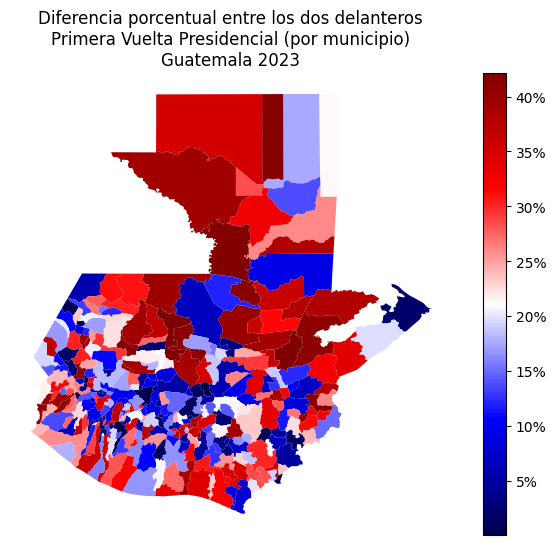

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

# getting the original colormap using cm.get_cmap() function
#orig_map=plt.cm.get_cmap('seismic')
  
# reversing the original colormap using reversed() function
#c_map = orig_map.reversed()

c_map='seismic'

# # create the colorbar
norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)



dfg.plot(ax=ax,column='graph', legend=False, cmap=c_map)

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Diferencia porcentual entre los dos delanteros\nPrimera Vuelta Presidencial (por municipio)\nGuatemala 2023')


plt.show()

In [41]:
#correlacion diferencia-nulo
series_mun_nu=(df_pre.groupby(df_pre['CODIGO_MUN'])[partidos_pre+['NULOS']].sum()['NULOS']).divide(df_pre.groupby(df_pre['CODIGO_MUN'])['EMITIDOS'].sum())
series_mun_us=((df_ddt.groupby(df_ddt['CODIGO_MUN'])[partidos_pre].sum()['UNE']+df_dnc.groupby(df_dnc['CODIGO_MUN'])[partidos_pre].sum()['VAMOS'])/2).divide(df_pre.groupby(df_pre['CODIGO_MUN'])['EMITIDOS'].sum())

In [42]:
series_mun_nu.corr(series_mun_us)

-0.1956687627234765

In [43]:
#Cluster mapa
df_total=df_pre[['EMITIDOS','CODIGO_MUN']].groupby(df_pre['CODIGO_MUN']).sum().copy()
df_sca=df_pre[partidos_pre+['CODIGO_MUN']].groupby(df_pre['CODIGO_MUN']).sum().copy()
df_nor=df_sca[partidos_pre].div(df_total['EMITIDOS'], axis=0).copy().fillna(0)


In [44]:
inertias=[]
for k in range(2,20):
    kmeans = KMeans(n_clusters=k).fit(df_nor)
    inertias.append(kmeans.inertia_)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

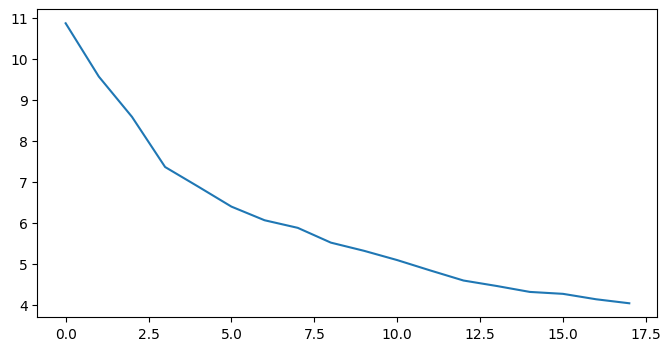

In [45]:
plt.plot(inertias)

In [46]:
kmeans = KMeans(n_clusters=6).fit(df_nor)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
centroids=kmeans.cluster_centers_
clusters = kmeans.labels_
inertia=kmeans.inertia_
series_clusters = pd.Series(clusters, index =df_nor.index)

In [48]:
inertia

6.896474792351735

In [820]:
pd.Series(centroids[4]*100, index=df_nor.columns)

UNE                11.951443
AZUL                1.342779
VALOR UNIONISTA     5.894378
CABAL               6.732250
TODOS               1.795124
VAMOS               7.551452
PHG                 0.474842
PR                  0.417402
PIN                 0.102756
ELEFANTE            0.723059
VICTORIA            2.633013
SEMILLA             7.322562
FCN-NACION          0.383231
PPN                 1.271934
UR                  0.569924
URNG-MAIZ WINAQ     1.662507
CREO                0.757272
BIEN                2.139674
VIVA                9.647593
MI FAMILIA          0.695370
CAMBIO              0.323434
VOS                 2.940089
dtype: float64

In [49]:
try:
    del dfg
except:
    pass
dfg=plot_muns_rat(series_clusters)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/613446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_35120/4223272708.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('Accent')


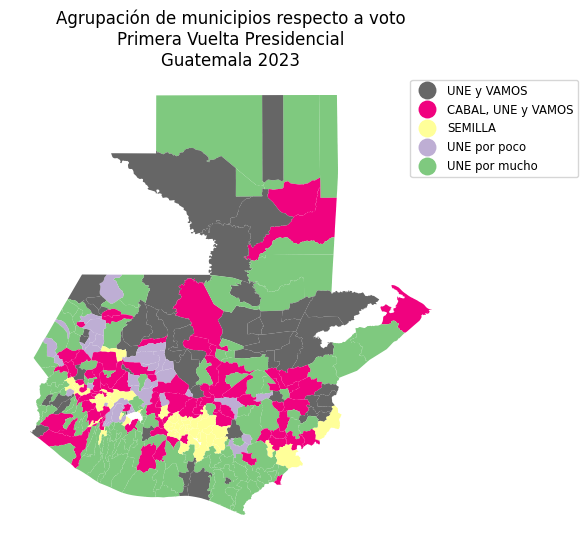

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

#c_map='Set3'

# # create the colorbar
#norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
#cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Accent')
  
# reversing the original colormap using reversed() function
c_map = orig_map.reversed()



dfg.plot(ax=ax,column='graph', legend=True, cmap=c_map, categorical=True,
         legend_kwds={'loc':'upper right', 
                        'bbox_to_anchor':(1.3, 1), 
                        'markerscale':1.29, 
                        'title_fontsize':'medium', 
                        'fontsize':'small'}, )

#ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0}")
plt.axis('off')
plt.title('Agrupación de municipios respecto a voto\nPrimera Vuelta Presidencial\nGuatemala 2023')


leg1 = ax.get_legend()

#new_legtxt = ["UNE y SEMILLA similar","UNE primero VAMOS segundo"]
new_legtxt = ["UNE y VAMOS","CABAL, UNE y VAMOS","SEMILLA","UNE por poco","UNE por mucho"]
for ix,eb in enumerate(leg1.get_texts()):
    #print(eb.get_text(), "-->", new_legtxt[ix])
    eb.set_text(new_legtxt[ix])

plt.show()


In [ ]:
#abstencionismo geografico

In [102]:
#series_plot=df_pre['EMITIDOS'].groupby(df_pre['DEPARTAMENTO']).sum().div(df_pre['PADRÓN'].groupby(df_pre['DEPARTAMENTO']).sum())
series_plot=((df_pre['PADRÓN'].groupby(df_pre['DEPARTAMENTO']).sum()-df_pre['EMITIDOS'].groupby(df_pre['DEPARTAMENTO']).sum()).div(df_pre['PADRÓN'].groupby(df_pre['DEPARTAMENTO']).sum()))

try:
    del dfg
except:
    pass
dfg=plot_depts_rat(series_plot)

/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_44953/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_44953/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg_temp['graph'].iloc[idx]=value
/var/folders/7p/ynbz7vk57r9gcxqxj2hx4s6c0000gn/T/ipykernel_44953/215976582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [104]:
series_plot

DEPARTAMENTO
Alta Verapaz                       0.344973
Baja Verapaz                       0.397138
Chimaltenango                      0.382154
Chiquimula                         0.417713
Distrito Central                   0.445495
El Progreso                        0.353243
Escuintla                          0.400248
Guatemala                          0.405355
Guatemaltecos en Estados Unidos    0.985007
Huehuetenango                      0.454392
Izabal                             0.433653
Jalapa                             0.430997
Jutiapa                            0.392924
Petén                              0.466443
Quetzaltenango                     0.411479
Quiché                             0.374587
Retalhuleu                         0.438482
Sacatepéquez                       0.327655
San Marcos                         0.445249
Santa Rosa                         0.407176
Sololá                             0.251559
Suchitepéquez                      0.387128
Totonicapán        

In [101]:
for index, value in (df_pre['PADRÓN'].groupby(df_pre['DEPARTAMENTO']).sum()-df_pre['EMITIDOS'].groupby(df_pre['DEPARTAMENTO']).sum()).div(df_pre['PADRÓN'].groupby(df_pre['DEPARTAMENTO']).sum()).items():
    print(index, "{:.0f}%".format(value*100))

Alta Verapaz 34%
Baja Verapaz 40%
Chimaltenango 38%
Chiquimula 42%
Distrito Central 45%
El Progreso 35%
Escuintla 40%
Guatemala 41%
Guatemaltecos en Estados Unidos 99%
Huehuetenango 45%
Izabal 43%
Jalapa 43%
Jutiapa 39%
Petén 47%
Quetzaltenango 41%
Quiché 37%
Retalhuleu 44%
Sacatepéquez 33%
San Marcos 45%
Santa Rosa 41%
Sololá 25%
Suchitepéquez 39%
Totonicapán 42%
Zacapa 38%


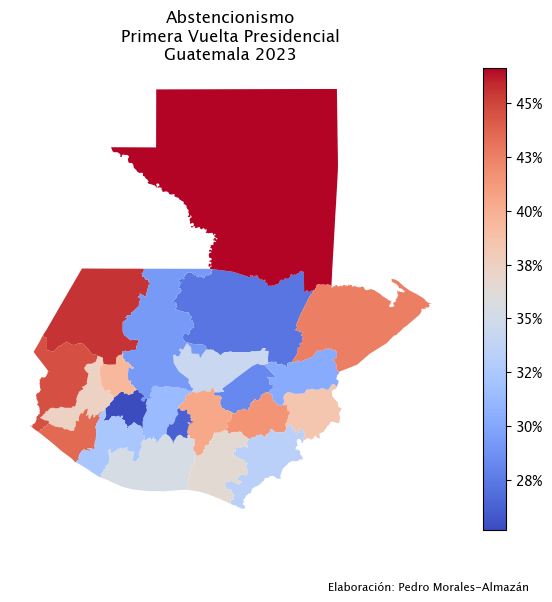

In [106]:
fig, ax = plt.subplots(figsize=(8,6))

# getting the original colormap using cm.get_cmap() function
#orig_map=plt.cm.get_cmap('Blues')
  
# reversing the original colormap using reversed() function
#c_map = orig_map.reversed()

c_map='coolwarm'

# # create the colorbar
norm = colors.Normalize(vmin=dfg['graph'].min(), vmax=dfg['graph'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=c_map)




dfg.plot(ax=ax,column='graph', legend=False, cmap=c_map)

ax_cbar = fig.colorbar(cbar, ax=ax,format=lambda x, _: f"{x:.0%}")
plt.axis('off')
plt.title('Abstencionismo\nPrimera Vuelta Presidencial\nGuatemala 2023')

txt="Elaboración: Pedro Morales-Almazán"
plt.figtext(0.59, 0.01, txt, wrap=True, horizontalalignment='left', fontsize=8)


plt.savefig('img_abs_depts.png', bbox_inches='tight', dpi=300)


plt.show()